<a href="https://colab.research.google.com/github/ZhalgasbekAyaz/Statistical-Learning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [802]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time

In [803]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [804]:
data = pd.read_csv('/content/drive/MyDrive/Masters/Stat learning/diabetes.csv')
data.head()
#data.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

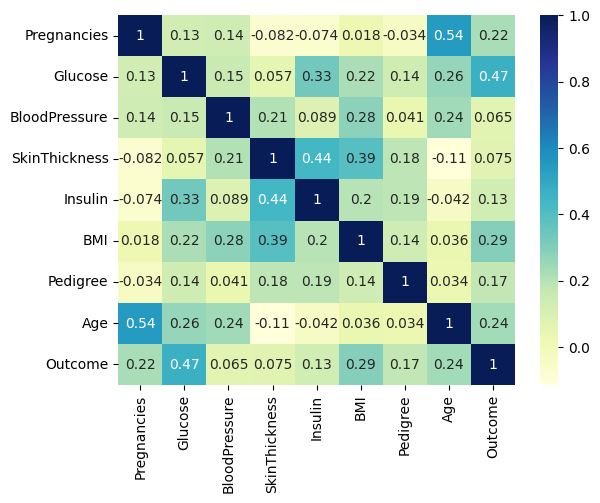

In [805]:
sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu')

In [806]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [807]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [808]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kNN Classifier

In [809]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [810]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn.fit(X_train_scaled, y_train)
y_pred = knn_fit.predict(X_test_scaled)

In [811]:
print('Total accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Total accuracy:  0.7077922077922078
Confusion matrix:  [[81 18]
 [27 28]]


In [812]:
start_time = time.time()
train_acc = []
test_acc = []
for n in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    train_acc.append(knn.score(X_train_scaled,y_train))
    test_acc.append(accuracy_score(y_test, y_pred))

#print("Train score:", train_acc)
#print("Test score: ", test_acc)

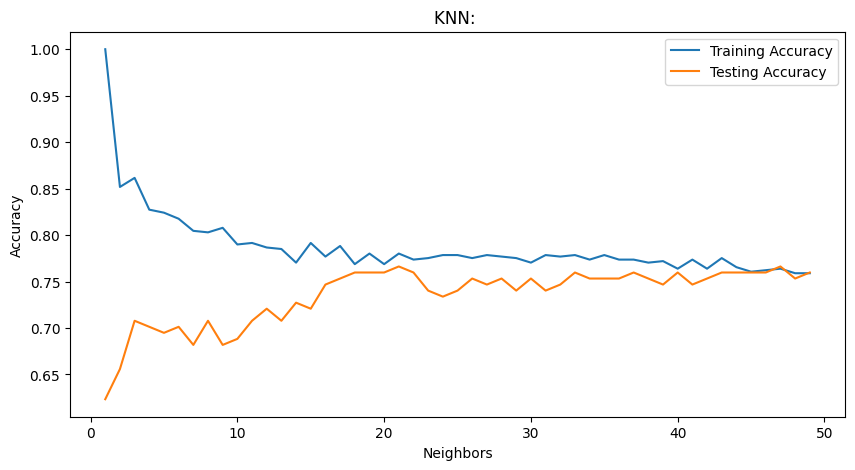

In [813]:
plt.figure(figsize=(10,5))
plt.plot(range(1,50),train_acc, label='Training Accuracy')
plt.plot(range(1,50),test_acc, label='Testing Accuracy')
plt.title("KNN: ")
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [814]:
print("The optimum value for k neighbours is ", np.argmax(test_acc)+1)

The optimum value for k neighbours is  21


In [815]:
knn = KNeighborsClassifier(n_neighbors= np.argmax(test_acc)+1)
knn_fit = knn.fit(X_train_scaled, y_train)
y_pred = knn_fit.predict(X_test_scaled)

In [816]:
print('Total accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Total accuracy:  0.7662337662337663
Confusion matrix:  [[89 10]
 [26 29]]


In [817]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 2.3380026817321777 seconds


# Cross-Validation for kNN

In [818]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [819]:
knn = KNeighborsClassifier()

In [820]:
start_time = time.time()
train_acc_val = []
test_acc_val = []
for n in range(1, 50):
    knn.n_neighbors = n
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    test_acc_val.append(np.mean(scores))

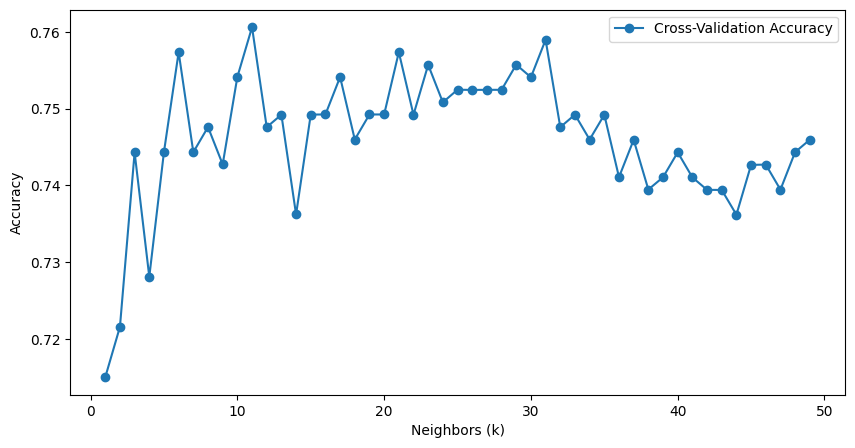

In [821]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 50), test_acc_val, marker = 'o', label='Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [822]:
optimal_k = np.argmax(test_acc_val) + 1
print("The optimum value for k neighbors is ", optimal_k)

The optimum value for k neighbors is  11


In [823]:
knn.n_neighbors = optimal_k
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
val_acc = np.mean(scores)
print("The maximum cross-validation accuracy is:", val_acc)

The maximum cross-validation accuracy is: 0.7606024256963881


In [824]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 2.3524329662323 seconds


## 10 folds

In [825]:
start_time = time.time()
train_acc_val_10 = []
test_acc_val_10 = []
for n in range(1, 50):
    knn.n_neighbors = n
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
    test_acc_val_10.append(np.mean(scores))

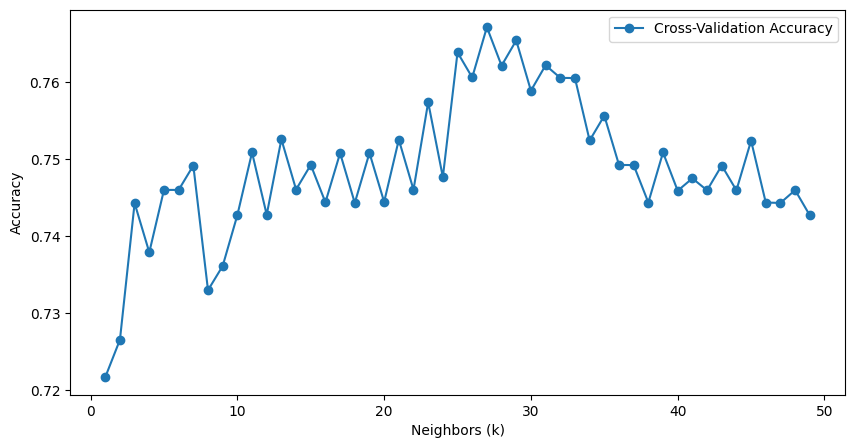

In [826]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 50), test_acc_val_10, marker = 'o', label='Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [827]:
optimal_k = np.argmax(test_acc_val_10) + 1
print("The optimum value for k neighbors is ", optimal_k)

The optimum value for k neighbors is  27


In [828]:
knn.n_neighbors = optimal_k
scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
val_acc = np.mean(scores)
print("The maximum cross-validation accuracy is:", val_acc)

The maximum cross-validation accuracy is: 0.7671866737176097


In [829]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.949276924133301 seconds


## 15 folds

In [830]:
start_time = time.time()
train_acc_val_15 = []
test_acc_val_15 = []
for n in range(1, 50):
    knn.n_neighbors = n
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=15)
    test_acc_val_15.append(np.mean(scores))

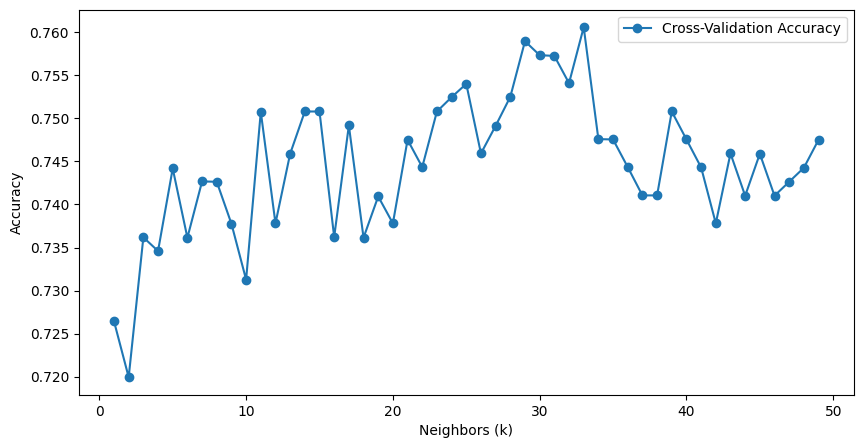

In [831]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 50), test_acc_val_15, marker = 'o', label='Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [832]:
optimal_k = np.argmax(test_acc_val_15) + 1
print("The optimum value for k neighbors is ", optimal_k)

The optimum value for k neighbors is  33


In [833]:
knn.n_neighbors = optimal_k
scores = cross_val_score(knn, X_train_scaled, y_train, cv=15)
val_acc = np.mean(scores)
print("The maximum cross-validation accuracy is:", val_acc)

The maximum cross-validation accuracy is: 0.760609756097561


In [834]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.8229265213012695 seconds


# SVM

In [835]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


## RBF

In [836]:
svc=SVC()
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7337662337662337

In [837]:
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [24, 31]])

In [838]:
start_time = time.time()
params = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(SVC(),params,refit=True,verbose=3)
grid.fit(X_train_scaled,y_train)
grid.best_params_
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [839]:
svc =SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7727272727272727

In [840]:
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [18, 37]])

In [841]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.6110482215881348 seconds


## Linear

In [842]:
start_time = time.time()
svc = SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7597402597402597

In [843]:
confusion_matrix(y_test,y_pred)

array([[81, 18],
       [19, 36]])

In [844]:
params = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear']}
grid = GridSearchCV(SVC(),params,refit=True,verbose=3)
grid.fit(X_train_scaled,y_train)
grid.best_params_
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.805 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.748 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [845]:
svc =SVC(C=10,gamma=1,kernel='linear')
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7597402597402597

In [846]:
confusion_matrix(y_test,y_pred)

array([[81, 18],
       [19, 36]])

In [847]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 44.36197209358215 seconds


# Random Forest

In [848]:
from sklearn.ensemble import RandomForestClassifier

In [849]:
start_time = time.time()

In [850]:
accuracy_scores = []
n_estimators_values = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [851]:
for n_estimators in n_estimators_values:
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    cross_val_accuracy = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(cross_val_accuracy))

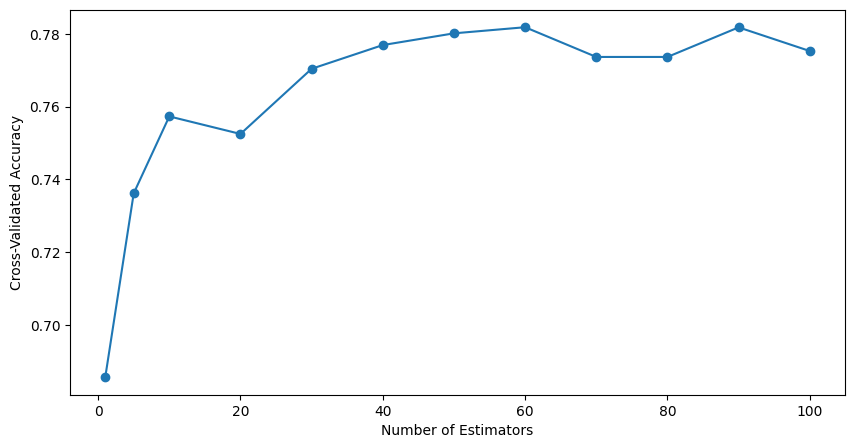

In [852]:
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracy_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [853]:
optimal_n_estimators = n_estimators_values[np.argmax(accuracy_scores)]
print(f"The optimal value of n_estimators is: {optimal_n_estimators}")

The optimal value of n_estimators is: 60


In [854]:
optimal_random_forest = RandomForestClassifier(n_estimators=90, random_state=42)
optimal_random_forest.fit(X_train, y_train)
y_pred_optimal = optimal_random_forest.predict(X_test)
#y_pred_optimal

In [855]:
random_forest = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
cross_val_accuracy = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='accuracy')
np.mean(cross_val_accuracy)

0.7818472610955618

In [856]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 5.055869817733765 seconds
